In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:/datasets/israel_conflict_2000_to_2023/fatalities_isr_pse_conflict_2000_to_2023.csv')

In [3]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
df.shape

(11124, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [6]:
pd.isnull(df).sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
pd.isnull(df).sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
notes                           0
dtype: int64

In [9]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

In [10]:
df.describe()

,age
count,4661.000000
mean,26.977044
std,14.363839
min,1.000000
25%,18.000000
50%,23.000000
75%,32.000000
max,91.000000


Demographic Analysis

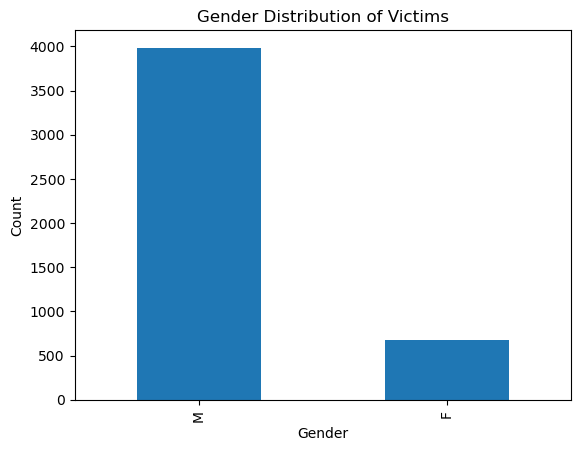

In [11]:
# Gender Distribution of Victims
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar')   
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Victims')
plt.show()

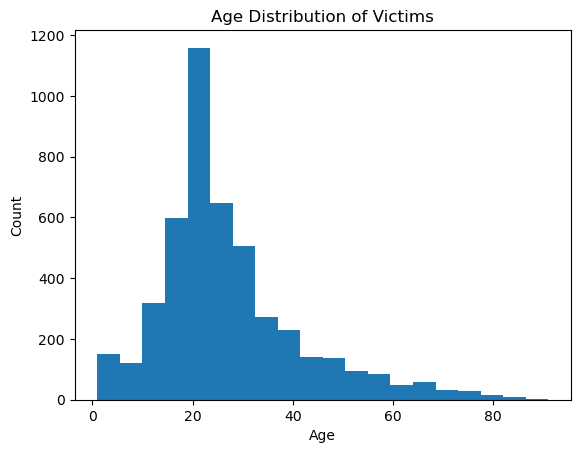

In [12]:
# Age Distribution of Victims
plt.hist(df['age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Victims')
plt.show()

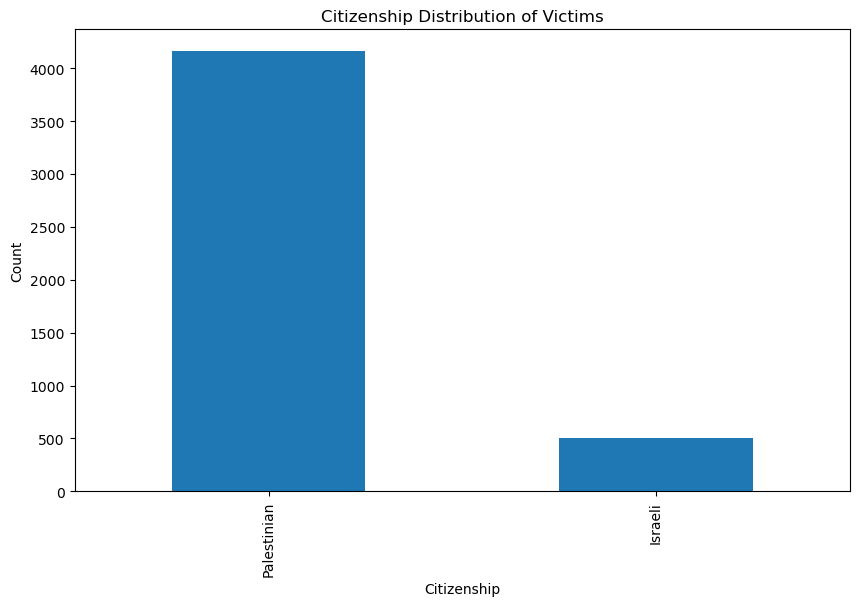

In [13]:
# Citizenship Distribution of Victims
citizenship_counts = df['citizenship'].value_counts()
citizenship_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.title('Citizenship Distribution of Victims')
plt.show()

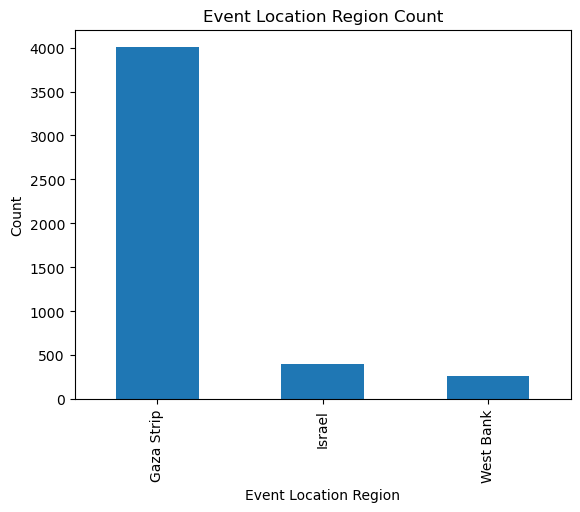

In [14]:
# Gender Distribution of Victims
event_location = df['event_location_region'].value_counts()
event_location.plot(kind='bar')   
plt.xlabel('Event Location Region')
plt.ylabel('Count')
plt.title('Event Location Region Count')
plt.show()


Injury Analysis

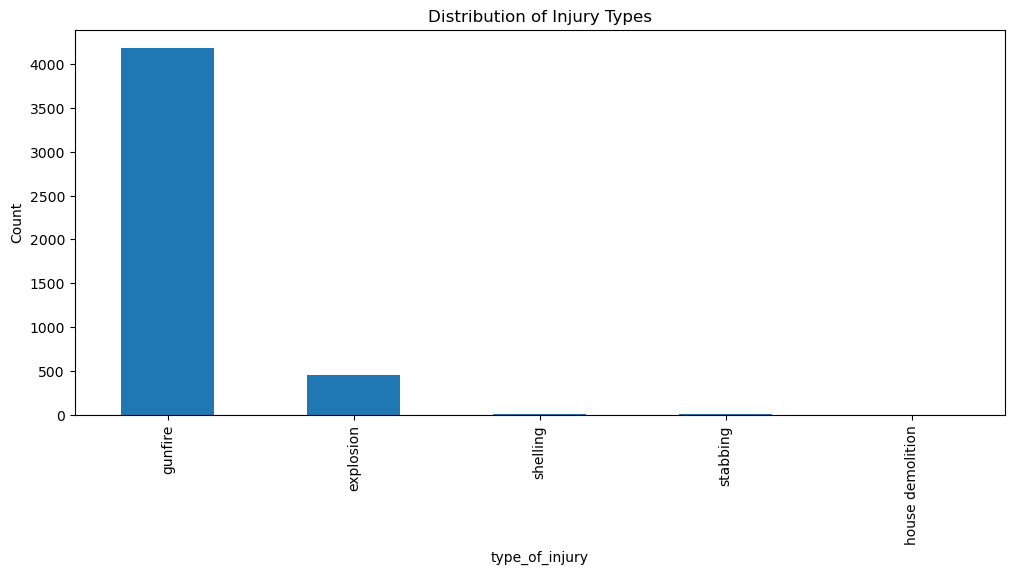

In [15]:
injury_counts = df['type_of_injury'].value_counts()
fig1 = plt.subplots(figsize=(12,5))
injury_counts.plot(kind='bar')
plt.xlabel('type_of_injury')
plt.ylabel('Count')
plt.title('Distribution of Injury Types')
plt.show()

In [16]:
N = 10  # Change N to get the top N most common injuries
most_common_injuries = injury_counts.head(N)
print(most_common_injuries)

type_of_injury
gunfire             4181
explosion            452
shelling              13
stabbing              13
house demolition       2
Name: count, dtype: int64


In [17]:
age_wise_injury = df.groupby('type_of_injury')['age'].mean()
print(age_wise_injury)


type_of_injury
explosion           36.825221
gunfire             25.869170
house demolition    19.000000
shelling            30.384615
stabbing            38.692308
Name: age, dtype: float64


Event Analysis

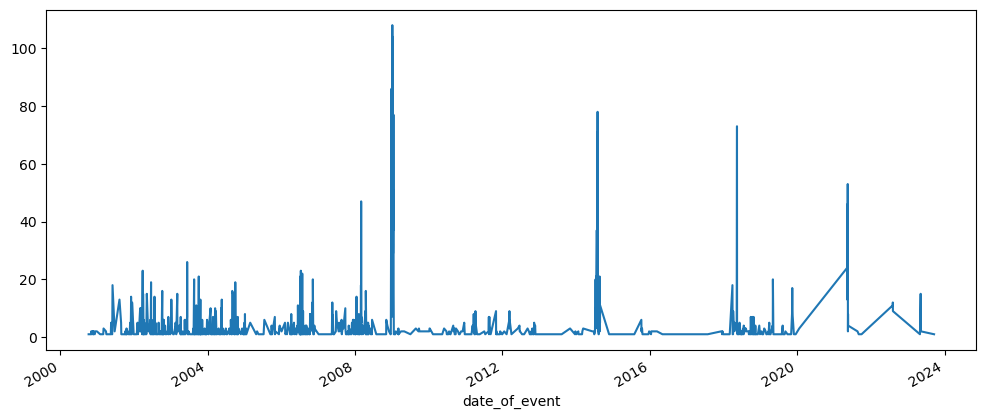

In [18]:
# Convert date_of_event to datetime if it's not already in datetime format
df['date_of_event'] = pd.to_datetime(df['date_of_event'])

# Event Count by Date
event_counts_by_date = df.groupby('date_of_event').size()
fig1 = plt.subplots(figsize=(12,5))
event_counts_by_date.plot()
plt.show()

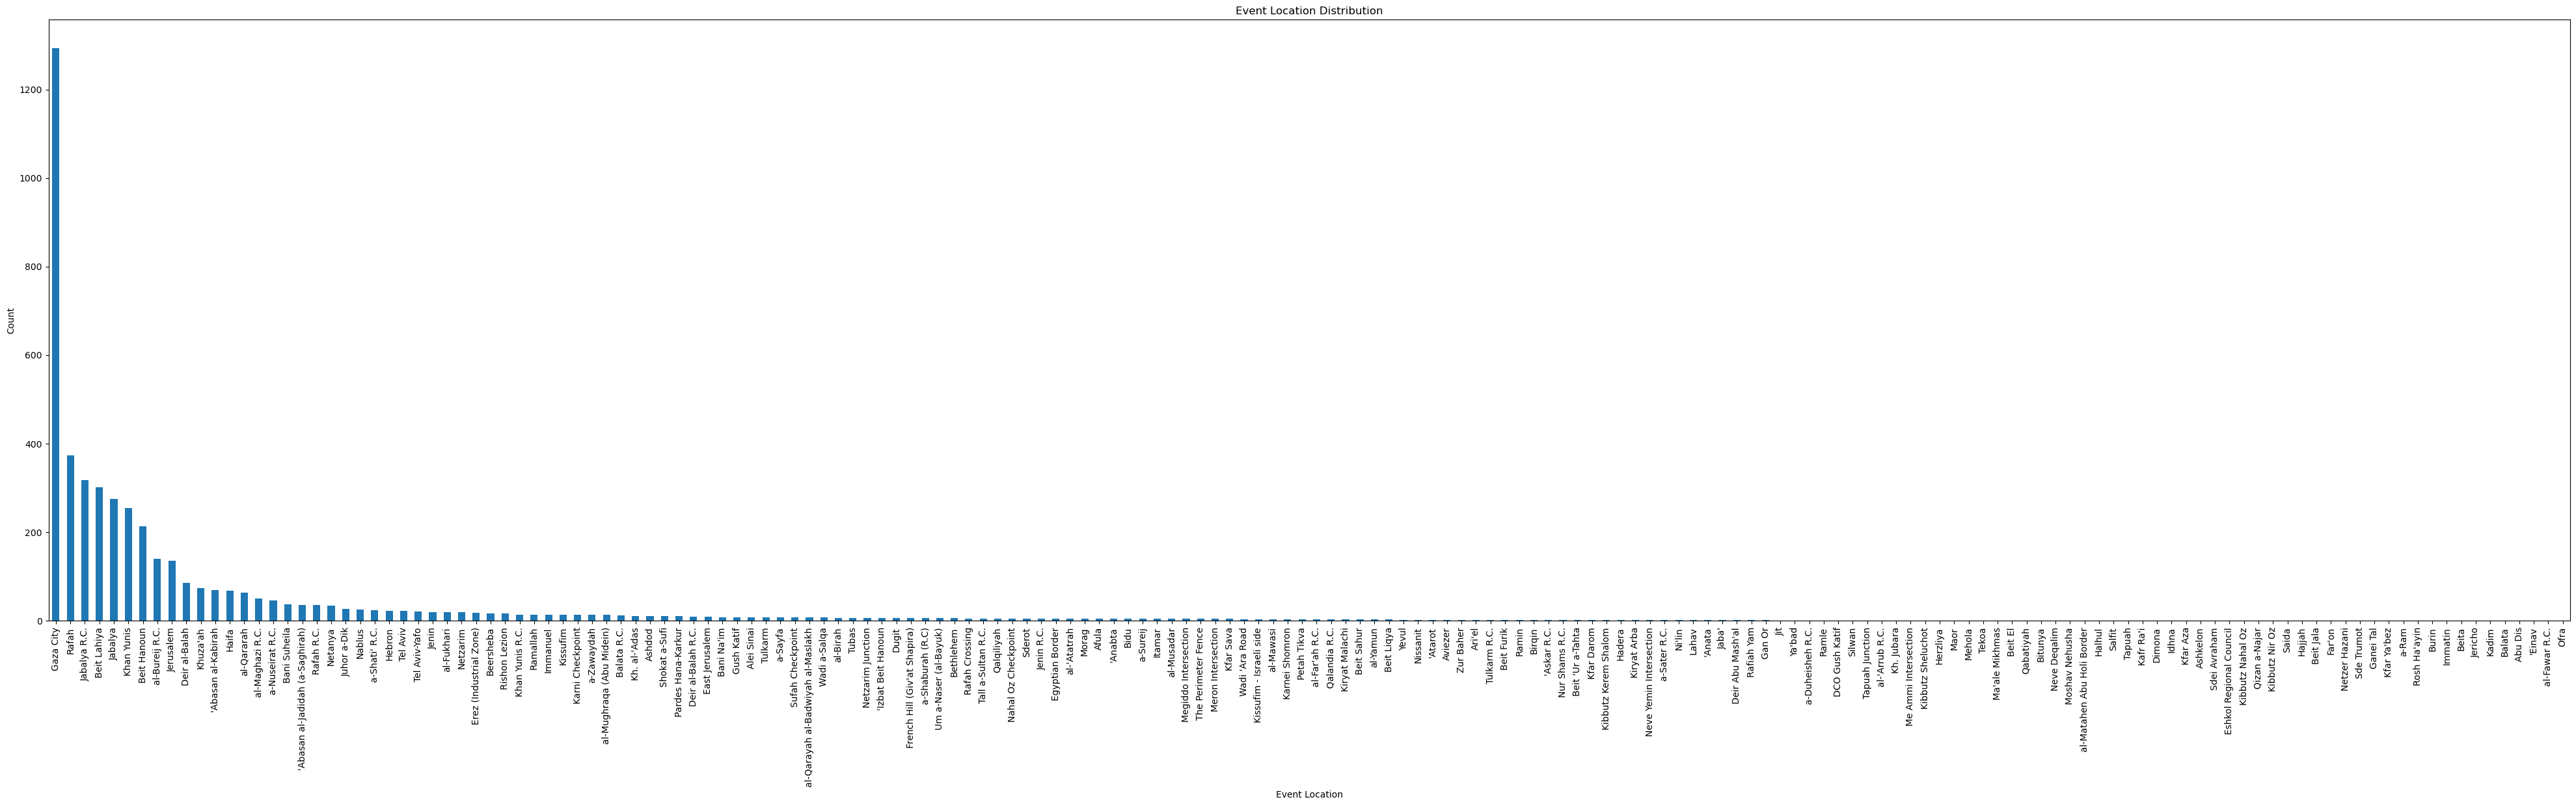

In [19]:
# Event Locations Distribution
event_location_counts = df['event_location'].value_counts()
fig1 = plt.subplots(figsize=(50,12))
event_location_counts.plot(kind='bar')
plt.xlabel('Event Location')
plt.ylabel('Count')
plt.title('Event Location Distribution')
plt.show()

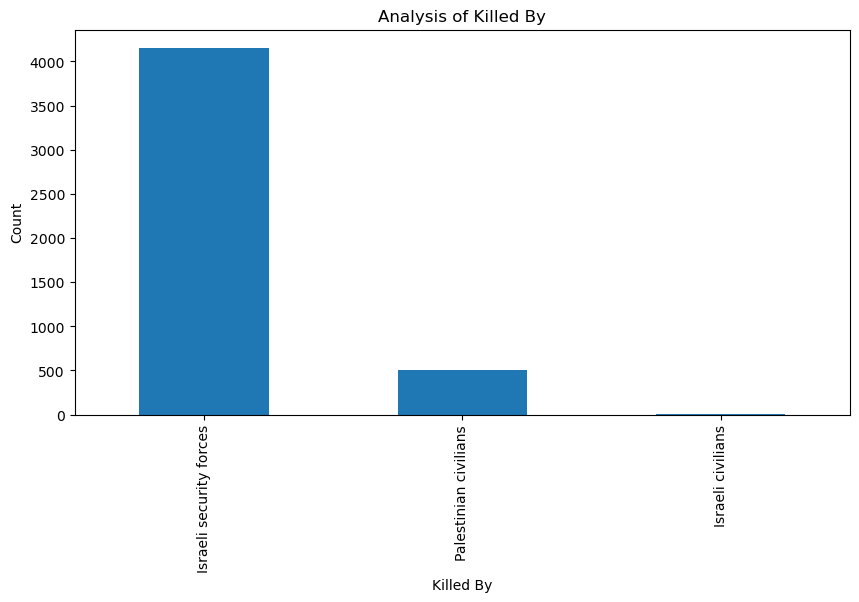

In [20]:
# Killed By Analysis
killed_by_counts = df['killed_by'].value_counts()
fig1 = plt.subplots(figsize=(10,5))
killed_by_counts.plot(kind='bar')
plt.xlabel('Killed By')
plt.ylabel('Count')
plt.title('Analysis of Killed By')
plt.show()

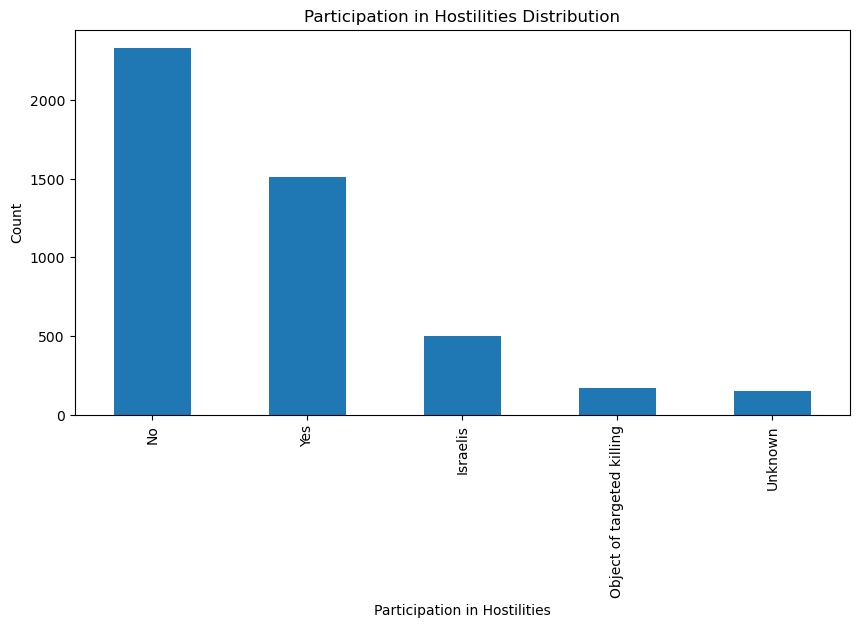

In [21]:
# Participation in Hostilities
participation_counts = df['took_part_in_the_hostilities'].value_counts()
fig1 = plt.subplots(figsize=(10,5))
participation_counts.plot(kind='bar')
plt.xlabel('Participation in Hostilities')
plt.ylabel('Count')
plt.title('Participation in Hostilities Distribution')
plt.show()

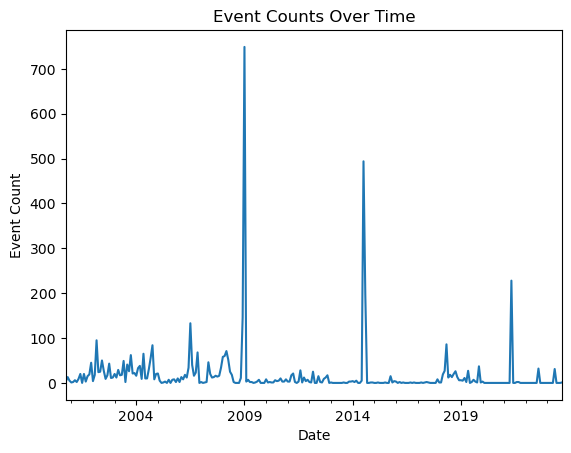

In [22]:
# Resample data to monthly frequency and plot event counts
df.set_index('date_of_event', inplace=True)
event_counts_monthly = df.resample('M').size()
event_counts_monthly.plot()
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.title('Event Counts Over Time')
plt.show()

Weapon Used

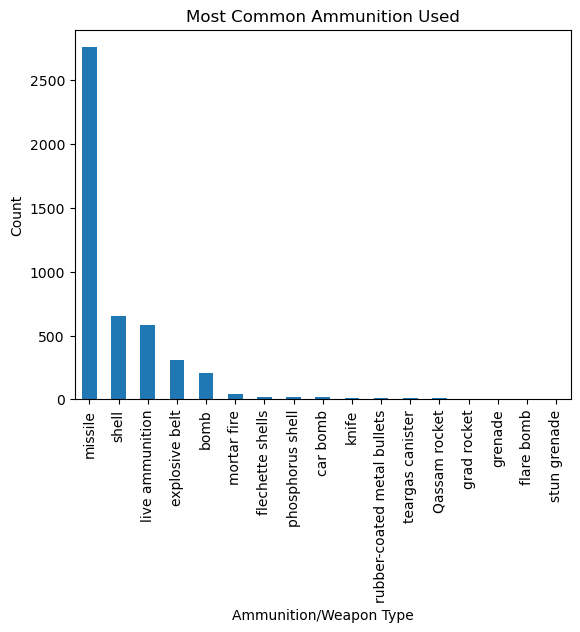

In [23]:
# Most Common Ammunition/Weapons Used
ammunition_counts = df['ammunition'].value_counts()
ammunition_counts.plot(kind='bar')
plt.xlabel('Ammunition/Weapon Type')
plt.ylabel('Count')
plt.title('Most Common Ammunition Used')
plt.show()

Victim profiles

In [24]:
victim_profiles = df[['age', 'gender', 'citizenship', 'place_of_residence']]

# Display common characteristics among victims
common_victim_characteristics = victim_profiles.mode().transpose()
common_victim_characteristics.columns = ['Common Characteristic']
print(common_victim_characteristics)


                   Common Characteristic
age                                 23.0
gender                                 M
citizenship                  Palestinian
place_of_residence             Gaza city
